Датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"polinacher","key":"4212bde0718d3cca2837f2f69323a782"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d iamsouravbanerjee/house-rent-prediction-dataset

  0% 0.00/82.4k [00:00<?, ?B/s]
100% 82.4k/82.4k [00:00<00:00, 69.8MB/s]


In [ ]:
! unzip  '/content/house-rent-prediction-dataset.zip' -d '/content/house-rent-prediction-dataset'

Archive:  /content/house-rent-prediction-dataset.zip
  inflating: /content/house-rent-prediction-dataset/Dataset Glossary.txt  
  inflating: /content/house-rent-prediction-dataset/House_Rent_Dataset.csv  


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/house-rent-prediction-dataset/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
df = df.rename(columns={'Posted On': 'Publication Date'}) # переименование с 'Опубликовано' на 'Дата публикации'
print(f"""Наименьшая дата - {df['Publication Date'].min()}
Наибольшая дата - {df['Publication Date'].max()}
Количество недель - {len(df)}""")

Наименьшая дата - 2022-04-13
Наибольшая дата - 2022-07-11
Количество недель - 4746


Целевой переменной является **Rent** -- арендная плата для домов/апартаментов/квартир.

<Axes: xlabel='Publication Date'>

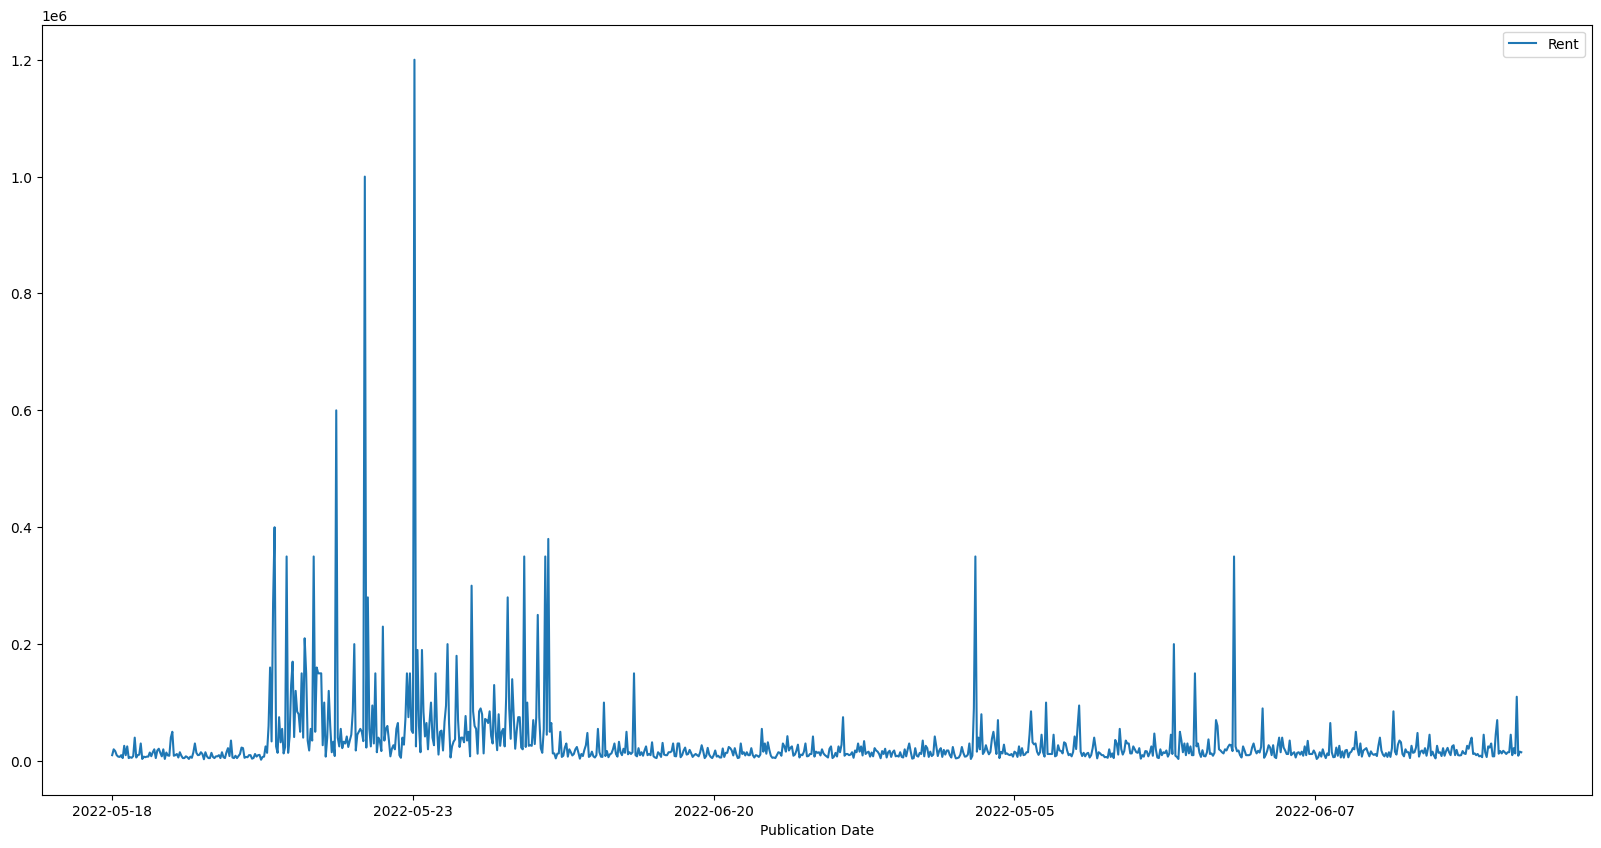

In [ ]:
df[df['Publication Date'].isin(df['Publication Date'].unique()[0:14])].plot(x='Publication Date', y='Rent', figsize=(20, 10))

Проведем стандартную преобработку данных. Категориальные признаки кодируем one-hot кодировкой, непрерывные -- нормируем.

In [ ]:
# Проверка признака 'Контакт для связи'
print(df['Point of Contact'].value_counts())

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64


In [ ]:
# Очистка от выбросов
df = df[~df['Point of Contact'].str.contains("Contact Builder")]
# Кодировка категориальных признаков
onehot_fields = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
for field in onehot_fields:
    dummies = pd.get_dummies(df[field], prefix=field, drop_first=False)
    df = pd.concat([df, dummies], axis=1)
df = df.drop(onehot_fields, axis = 1)

In [ ]:
# Изменение признака 'Этаж'
df = df.join(df['Floor'].str.split(' out of ', 1, expand=True).rename(columns={0:'Floor Level', 1:'Total Floors'}))
df['Floor Level'] = df.apply(lambda x: 0 if x['Floor Level'] =='Ground'
  else ( -1 if x['Floor Level'] =='Lower Basement' else (x['Total Floors']) ) , axis=1)
df.drop('Floor', axis=1, inplace=True)
df = df.dropna()
df['Floor Level'] = df['Floor Level'].astype(int)
df['Total Floors'] = df['Total Floors'].astype(int)

<ipython-input-13-35b96447d737>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df = df.join(df['Floor'].str.split(' out of ', 1, expand=True).rename(columns={0:'Floor Level', 1:'Total Floors'}))


In [ ]:
df.head()

,Publication Date,BHK,Rent,Size,Area Locality,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,...,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Owner,Floor Level,Total Floors
0,2022-05-18,2,10000,1100,Bandel,2,0,0,1,0,...,0,0,1,0,1,0,0,1,0,2
1,2022-05-13,2,20000,800,"Phool Bagan, Kankurgachi",1,0,0,1,0,...,0,1,0,0,1,0,0,1,3,3
2,2022-05-16,2,17000,1000,Salt Lake City Sector 2,1,0,0,1,0,...,0,1,0,0,1,0,0,1,3,3
3,2022-07-04,2,10000,800,Dumdum Park,1,0,0,1,0,...,0,0,1,0,1,0,0,1,2,2
4,2022-05-09,2,7500,850,South Dum Dum,1,0,1,0,0,...,0,0,1,1,0,0,0,1,2,2


In [ ]:
# Нормировка непрерывных признаков
continuous_fields = ['Rent','Size']
# Важно сохранить мат. ожидания и дисперсии, чтобы потом мы могли обратить нормировку
scaled_features = {}

for field in continuous_fields:
    mean, std = df[field].mean(), df[field].std()
    scaled_features[field] = [mean, std]
    df.loc[:, field] = (df[field] - mean)/std

In [ ]:
scaled_features

{'Rent': [35014.853406454335, 78144.64790646877],
 'Size': [967.7897068129087, 634.3690794594238]}

In [ ]:
df.sort_values(by='Publication Date', inplace=True) # сортировка по дате
df = df.reset_index(drop=True)
df.head()

,Publication Date,BHK,Rent,Size,Area Locality,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,...,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Owner,Floor Level,Total Floors
0,2022-04-13,3,2.879086,1.311871,JVPD Scheme,4,0,1,0,0,...,1,0,0,0,0,1,1,0,11,11
1,2022-04-23,2,-0.358500,-0.816228,safuipara,2,0,1,0,0,...,1,0,0,1,0,0,0,1,3,3
2,2022-04-23,1,-0.364898,-0.264499,Santragachi,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,1
3,2022-04-23,2,-0.192142,-0.422135,Salt Lake City Sector 1,1,0,0,1,0,...,1,0,0,0,1,0,0,1,2,2
4,2022-04-23,3,0.014206,1.154234,Salt Lake City,2,0,0,1,0,...,0,0,1,0,1,0,0,1,0,2


Выкинем лишние данные, которые не будем использовать в обучении, предварительно сохранив копию датафрейма.

In [ ]:
df_backup = df.copy()

fields_to_drop = ['Publication Date','Area Locality']
df.drop(fields_to_drop, axis=1, inplace = True)
df.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Owner,Floor Level,Total Floors
0,3,2.879086,1.311871,4,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,11,11
1,2,-0.358500,-0.816228,2,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,3,3
2,1,-0.364898,-0.264499,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
3,2,-0.192142,-0.422135,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,2,2
4,3,0.014206,1.154234,2,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,2


Разделим множество на тренировочную, валидационную и тестовую выборки. Так как это временной ряд, то имеет смысл разделение сделать не случайно, а на временные промежутки (на прошлом учимся, будущее предсказываем).

In [ ]:
# тестовая выборка - последние 20 дней
test_data = df[-20*24:]
df = df[:-20*24]
# валидационная выборка - 30 дней до тестовой
val_data = df[-30*24:]
df = df[:-30*24]
# тренировочная выборка -- оставшиеся дни
train_data = df

print(f'''Длина тестовой выборки: {len(test_data)}
Длина валидационной выборки: {len(val_data)}
Длина тренировочной выборки: {len(train_data)}''')

Длина тестовой выборки: 480
Длина валидационной выборки: 720
Длина тренировочной выборки: 3541


In [ ]:
target_fields = ['Rent']
target=['Rent']
train_features, train_targets = train_data.drop(target_fields, axis=1), train_data[target]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target]
val_features, val_targets = val_data.drop(target_fields, axis=1), val_data[target]

Создаем датасеты и загрузчики пакетов.

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision.transforms as T

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # вычисления на графическом процессоре, если возможно
device

'cuda'

In [ ]:
train_features, train_targets = torch.Tensor(train_features.values).float(), torch.Tensor(train_targets.values).float() # переводим данные в тензор
val_features, val_targets = torch.Tensor(val_features.values).float(), torch.Tensor(val_targets.values).float()
test_features, test_targets = torch.Tensor(test_features.values).float(), torch.Tensor(test_targets.values).float()

In [ ]:
train_dataset=TensorDataset(train_features, train_targets)
val_dataset=TensorDataset(val_features, val_targets)
test_dataset=TensorDataset(test_features, test_targets)

In [ ]:
train_dataset[0]

(tensor([ 3.0000,  1.3119,  4.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  1.0000,  1.0000,  0.0000, 11.0000, 11.0000]),
 tensor([2.8791]))

In [ ]:
batch_size=60 # размер пакета

In [ ]:
train_loader = DataLoader(train_dataset, batch_size, shuffle=False) # загрузчики данных
val_loader = DataLoader(val_dataset, batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)

Задаем архитектуру модели

In [ ]:
class HouseRent_Reg(nn.Module):
    def __init__(self):
        super(HouseRent_Reg, self).__init__()
        self.fc1 = nn.Linear(22, 6)
        self.fc2 = nn.Linear(6, 1)
        self.activation = nn.LeakyReLU(inplace=True)

    def forward(self, x):
        # 1-й слой
        x=self.fc1(x)
        x=self.activation(x)
        # 2-й слой (финальный)
        x=self.fc2(x)
        return x

In [ ]:
! pip install torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
model = HouseRent_Reg()
model.to(device)

HouseRent_Reg(
  (fc1): Linear(in_features=22, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=1, bias=True)
  (activation): LeakyReLU(negative_slope=0.01, inplace=True)
)

In [ ]:
summary(model, input_size=(1,22)) # детализация модели

Layer (type:depth-idx)                   Output Shape              Param #
HouseRent_Reg                            [1, 1]                    --
├─Linear: 1-1                            [1, 6]                    138
├─LeakyReLU: 1-2                         [1, 6]                    --
├─Linear: 1-3                            [1, 1]                    7
Total params: 145
Trainable params: 145
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

Выбираем функцию ошибки и алгоритм оптимизации.

In [ ]:
criterion = nn.MSELoss(reduction='mean') # функция ошибки
optimizer=torch.optim.Adam(model.parameters()) # алгоритм оптимизации

Прописываем цикл обучения и валидации.

In [ ]:
from tqdm import tqdm

In [ ]:
train_losses=[]
def train(model,epoch):
  print('\nEpoch : %d'%epoch)
  model.train() # веса модели можно обновлять
  running_loss=0
  for data in tqdm(train_loader):
      inputs, targets=data[0].to(device),data[1].to(device) # распаковываем пакеты
      optimizer.zero_grad() # обнуляем градиенты
      outputs=model(inputs) # считаем предсказания - прямой проход модели
      loss=criterion(outputs,targets) # ошибка пакета
      loss.backward() # обратное распространение ошибки
      optimizer.step() # итерация алгоритма оптимизации

      running_loss += loss.item()

  train_loss=running_loss/len(train_loader)
  train_losses.append(train_loss)
  print('Ошибка обучения в эпохе: %.4f'%(train_loss))

In [ ]:
val_losses=[]
def val(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.eval() # веса модели заморожены
    running_loss=0
    with torch.no_grad(): # запрещаем переисывать градиенты
        for data in tqdm(val_loader):
            inputs, targets=data[0].to(device),data[1].to(device)
            outputs=model(inputs)
            loss=criterion(outputs,targets)
            running_loss += loss.item()
        val_loss=running_loss/len(val_loader)
        val_losses.append(val_loss)
        print('Ошибка валидации в эпохе: %.4f:'%(val_loss))

Запускаем цикл обучения.

In [ ]:
max_epochs=75
for epoch in range(1,max_epochs+1):
    train(model, epoch)
    val(model,epoch)


Epoch : 1


100%|██████████| 60/60 [00:00<00:00, 286.54it/s]


Ошибка обучения в эпохе: 1.4663

Epoch : 1


100%|██████████| 12/12 [00:00<00:00, 479.85it/s]


Ошибка валидации в эпохе: 0.7067:

Epoch : 2


100%|██████████| 60/60 [00:00<00:00, 329.28it/s]


Ошибка обучения в эпохе: 1.0351

Epoch : 2


100%|██████████| 12/12 [00:00<00:00, 878.30it/s]


Ошибка валидации в эпохе: 0.4997:

Epoch : 3


100%|██████████| 60/60 [00:00<00:00, 414.04it/s]


Ошибка обучения в эпохе: 0.9895

Epoch : 3


100%|██████████| 12/12 [00:00<00:00, 804.14it/s]


Ошибка валидации в эпохе: 0.4511:

Epoch : 4


100%|██████████| 60/60 [00:00<00:00, 195.07it/s]


Ошибка обучения в эпохе: 0.9669

Epoch : 4


100%|██████████| 12/12 [00:00<00:00, 514.05it/s]


Ошибка валидации в эпохе: 0.4229:

Epoch : 5


100%|██████████| 60/60 [00:00<00:00, 418.60it/s]


Ошибка обучения в эпохе: 0.9288

Epoch : 5


100%|██████████| 12/12 [00:00<00:00, 769.91it/s]


Ошибка валидации в эпохе: 0.3488:

Epoch : 6


100%|██████████| 60/60 [00:00<00:00, 425.00it/s]


Ошибка обучения в эпохе: 0.8650

Epoch : 6


100%|██████████| 12/12 [00:00<00:00, 616.79it/s]


Ошибка валидации в эпохе: 0.2986:

Epoch : 7


100%|██████████| 60/60 [00:00<00:00, 356.76it/s]


Ошибка обучения в эпохе: 0.8272

Epoch : 7


100%|██████████| 12/12 [00:00<00:00, 739.88it/s]


Ошибка валидации в эпохе: 0.2782:

Epoch : 8


100%|██████████| 60/60 [00:00<00:00, 385.61it/s]


Ошибка обучения в эпохе: 0.8088

Epoch : 8


100%|██████████| 12/12 [00:00<00:00, 376.64it/s]


Ошибка валидации в эпохе: 0.2683:

Epoch : 9


100%|██████████| 60/60 [00:00<00:00, 330.47it/s]


Ошибка обучения в эпохе: 0.7959

Epoch : 9


100%|██████████| 12/12 [00:00<00:00, 561.62it/s]


Ошибка валидации в эпохе: 0.2608:

Epoch : 10


100%|██████████| 60/60 [00:00<00:00, 419.74it/s]


Ошибка обучения в эпохе: 0.7856

Epoch : 10


100%|██████████| 12/12 [00:00<00:00, 649.56it/s]


Ошибка валидации в эпохе: 0.2542:

Epoch : 11


100%|██████████| 60/60 [00:00<00:00, 423.27it/s]


Ошибка обучения в эпохе: 0.7766

Epoch : 11


100%|██████████| 12/12 [00:00<00:00, 644.93it/s]


Ошибка валидации в эпохе: 0.2487:

Epoch : 12


100%|██████████| 60/60 [00:00<00:00, 376.91it/s]


Ошибка обучения в эпохе: 0.7688

Epoch : 12


100%|██████████| 12/12 [00:00<00:00, 409.22it/s]


Ошибка валидации в эпохе: 0.2445:

Epoch : 13


100%|██████████| 60/60 [00:00<00:00, 397.07it/s]


Ошибка обучения в эпохе: 0.7618

Epoch : 13


100%|██████████| 12/12 [00:00<00:00, 500.57it/s]


Ошибка валидации в эпохе: 0.2410:

Epoch : 14


100%|██████████| 60/60 [00:00<00:00, 247.19it/s]


Ошибка обучения в эпохе: 0.7555

Epoch : 14


100%|██████████| 12/12 [00:00<00:00, 411.10it/s]


Ошибка валидации в эпохе: 0.2382:

Epoch : 15


100%|██████████| 60/60 [00:00<00:00, 252.10it/s]


Ошибка обучения в эпохе: 0.7497

Epoch : 15


100%|██████████| 12/12 [00:00<00:00, 579.41it/s]


Ошибка валидации в эпохе: 0.2355:

Epoch : 16


100%|██████████| 60/60 [00:00<00:00, 283.05it/s]


Ошибка обучения в эпохе: 0.7446

Epoch : 16


100%|██████████| 12/12 [00:00<00:00, 476.57it/s]


Ошибка валидации в эпохе: 0.2324:

Epoch : 17


100%|██████████| 60/60 [00:00<00:00, 247.47it/s]


Ошибка обучения в эпохе: 0.7397

Epoch : 17


100%|██████████| 12/12 [00:00<00:00, 760.89it/s]


Ошибка валидации в эпохе: 0.2305:

Epoch : 18


100%|██████████| 60/60 [00:00<00:00, 443.60it/s]


Ошибка обучения в эпохе: 0.7353

Epoch : 18


100%|██████████| 12/12 [00:00<00:00, 699.66it/s]


Ошибка валидации в эпохе: 0.2291:

Epoch : 19


100%|██████████| 60/60 [00:00<00:00, 431.85it/s]


Ошибка обучения в эпохе: 0.7314

Epoch : 19


100%|██████████| 12/12 [00:00<00:00, 892.45it/s]


Ошибка валидации в эпохе: 0.2280:

Epoch : 20


100%|██████████| 60/60 [00:00<00:00, 459.92it/s]


Ошибка обучения в эпохе: 0.7277

Epoch : 20


100%|██████████| 12/12 [00:00<00:00, 864.51it/s]


Ошибка валидации в эпохе: 0.2265:

Epoch : 21


100%|██████████| 60/60 [00:00<00:00, 370.59it/s]


Ошибка обучения в эпохе: 0.7243

Epoch : 21


100%|██████████| 12/12 [00:00<00:00, 306.27it/s]


Ошибка валидации в эпохе: 0.2259:

Epoch : 22


100%|██████████| 60/60 [00:00<00:00, 352.08it/s]


Ошибка обучения в эпохе: 0.7212

Epoch : 22


100%|██████████| 12/12 [00:00<00:00, 719.82it/s]


Ошибка валидации в эпохе: 0.2247:

Epoch : 23


100%|██████████| 60/60 [00:00<00:00, 428.68it/s]


Ошибка обучения в эпохе: 0.7184

Epoch : 23


100%|██████████| 12/12 [00:00<00:00, 813.78it/s]


Ошибка валидации в эпохе: 0.2244:

Epoch : 24


100%|██████████| 60/60 [00:00<00:00, 386.41it/s]


Ошибка обучения в эпохе: 0.7155

Epoch : 24


100%|██████████| 12/12 [00:00<00:00, 898.36it/s]


Ошибка валидации в эпохе: 0.2236:

Epoch : 25


100%|██████████| 60/60 [00:00<00:00, 402.08it/s]


Ошибка обучения в эпохе: 0.7130

Epoch : 25


100%|██████████| 12/12 [00:00<00:00, 881.96it/s]


Ошибка валидации в эпохе: 0.2233:

Epoch : 26


100%|██████████| 60/60 [00:00<00:00, 380.85it/s]


Ошибка обучения в эпохе: 0.7105

Epoch : 26


100%|██████████| 12/12 [00:00<00:00, 414.36it/s]


Ошибка валидации в эпохе: 0.2230:

Epoch : 27


100%|██████████| 60/60 [00:00<00:00, 424.38it/s]


Ошибка обучения в эпохе: 0.7083

Epoch : 27


100%|██████████| 12/12 [00:00<00:00, 662.67it/s]


Ошибка валидации в эпохе: 0.2227:

Epoch : 28


100%|██████████| 60/60 [00:00<00:00, 243.66it/s]


Ошибка обучения в эпохе: 0.7061

Epoch : 28


100%|██████████| 12/12 [00:00<00:00, 332.91it/s]


Ошибка валидации в эпохе: 0.2222:

Epoch : 29


100%|██████████| 60/60 [00:00<00:00, 118.41it/s]


Ошибка обучения в эпохе: 0.7040

Epoch : 29


100%|██████████| 12/12 [00:00<00:00, 382.07it/s]


Ошибка валидации в эпохе: 0.2218:

Epoch : 30


100%|██████████| 60/60 [00:00<00:00, 208.23it/s]


Ошибка обучения в эпохе: 0.7021

Epoch : 30


100%|██████████| 12/12 [00:00<00:00, 350.55it/s]


Ошибка валидации в эпохе: 0.2215:

Epoch : 31


100%|██████████| 60/60 [00:00<00:00, 197.29it/s]


Ошибка обучения в эпохе: 0.7002

Epoch : 31


100%|██████████| 12/12 [00:00<00:00, 374.90it/s]


Ошибка валидации в эпохе: 0.2226:

Epoch : 32


100%|██████████| 60/60 [00:00<00:00, 244.24it/s]


Ошибка обучения в эпохе: 0.6987

Epoch : 32


100%|██████████| 12/12 [00:00<00:00, 345.11it/s]


Ошибка валидации в эпохе: 0.2203:

Epoch : 33


100%|██████████| 60/60 [00:00<00:00, 175.55it/s]


Ошибка обучения в эпохе: 0.6971

Epoch : 33


100%|██████████| 12/12 [00:00<00:00, 213.54it/s]


Ошибка валидации в эпохе: 0.2206:

Epoch : 34


100%|██████████| 60/60 [00:00<00:00, 171.06it/s]


Ошибка обучения в эпохе: 0.6956

Epoch : 34


100%|██████████| 12/12 [00:00<00:00, 286.82it/s]


Ошибка валидации в эпохе: 0.2204:

Epoch : 35


100%|██████████| 60/60 [00:00<00:00, 233.02it/s]


Ошибка обучения в эпохе: 0.6941

Epoch : 35


100%|██████████| 12/12 [00:00<00:00, 407.09it/s]


Ошибка валидации в эпохе: 0.2201:

Epoch : 36


100%|██████████| 60/60 [00:00<00:00, 262.31it/s]


Ошибка обучения в эпохе: 0.6928

Epoch : 36


100%|██████████| 12/12 [00:00<00:00, 700.77it/s]


Ошибка валидации в эпохе: 0.2199:

Epoch : 37


100%|██████████| 60/60 [00:00<00:00, 322.07it/s]


Ошибка обучения в эпохе: 0.6915

Epoch : 37


100%|██████████| 12/12 [00:00<00:00, 647.43it/s]


Ошибка валидации в эпохе: 0.2196:

Epoch : 38


100%|██████████| 60/60 [00:00<00:00, 296.55it/s]


Ошибка обучения в эпохе: 0.6902

Epoch : 38


100%|██████████| 12/12 [00:00<00:00, 721.88it/s]


Ошибка валидации в эпохе: 0.2193:

Epoch : 39


100%|██████████| 60/60 [00:00<00:00, 359.18it/s]


Ошибка обучения в эпохе: 0.6890

Epoch : 39


100%|██████████| 12/12 [00:00<00:00, 464.92it/s]


Ошибка валидации в эпохе: 0.2191:

Epoch : 40


100%|██████████| 60/60 [00:00<00:00, 243.06it/s]


Ошибка обучения в эпохе: 0.6878

Epoch : 40


100%|██████████| 12/12 [00:00<00:00, 219.14it/s]


Ошибка валидации в эпохе: 0.2206:

Epoch : 41


100%|██████████| 60/60 [00:00<00:00, 285.67it/s]


Ошибка обучения в эпохе: 0.6868

Epoch : 41


100%|██████████| 12/12 [00:00<00:00, 603.97it/s]


Ошибка валидации в эпохе: 0.2187:

Epoch : 42


100%|██████████| 60/60 [00:00<00:00, 250.69it/s]


Ошибка обучения в эпохе: 0.6859

Epoch : 42


100%|██████████| 12/12 [00:00<00:00, 462.94it/s]


Ошибка валидации в эпохе: 0.2190:

Epoch : 43


100%|██████████| 60/60 [00:00<00:00, 289.11it/s]


Ошибка обучения в эпохе: 0.6848

Epoch : 43


100%|██████████| 12/12 [00:00<00:00, 664.22it/s]


Ошибка валидации в эпохе: 0.2189:

Epoch : 44


100%|██████████| 60/60 [00:00<00:00, 305.01it/s]


Ошибка обучения в эпохе: 0.6839

Epoch : 44


100%|██████████| 12/12 [00:00<00:00, 649.61it/s]


Ошибка валидации в эпохе: 0.2189:

Epoch : 45


100%|██████████| 60/60 [00:00<00:00, 447.44it/s]


Ошибка обучения в эпохе: 0.6830

Epoch : 45


100%|██████████| 12/12 [00:00<00:00, 880.72it/s]


Ошибка валидации в эпохе: 0.2188:

Epoch : 46


100%|██████████| 60/60 [00:00<00:00, 428.84it/s]


Ошибка обучения в эпохе: 0.6821

Epoch : 46


100%|██████████| 12/12 [00:00<00:00, 826.29it/s]


Ошибка валидации в эпохе: 0.2188:

Epoch : 47


100%|██████████| 60/60 [00:00<00:00, 442.52it/s]


Ошибка обучения в эпохе: 0.6812

Epoch : 47


100%|██████████| 12/12 [00:00<00:00, 427.38it/s]


Ошибка валидации в эпохе: 0.2188:

Epoch : 48


100%|██████████| 60/60 [00:00<00:00, 407.27it/s]


Ошибка обучения в эпохе: 0.6804

Epoch : 48


100%|██████████| 12/12 [00:00<00:00, 436.09it/s]


Ошибка валидации в эпохе: 0.2188:

Epoch : 49


100%|██████████| 60/60 [00:00<00:00, 282.42it/s]


Ошибка обучения в эпохе: 0.6797

Epoch : 49


100%|██████████| 12/12 [00:00<00:00, 866.08it/s]


Ошибка валидации в эпохе: 0.2188:

Epoch : 50


100%|██████████| 60/60 [00:00<00:00, 413.09it/s]


Ошибка обучения в эпохе: 0.6789

Epoch : 50


100%|██████████| 12/12 [00:00<00:00, 550.85it/s]


Ошибка валидации в эпохе: 0.2190:

Epoch : 51


100%|██████████| 60/60 [00:00<00:00, 441.46it/s]


Ошибка обучения в эпохе: 0.6781

Epoch : 51


100%|██████████| 12/12 [00:00<00:00, 776.76it/s]


Ошибка валидации в эпохе: 0.2185:

Epoch : 52


100%|██████████| 60/60 [00:00<00:00, 242.89it/s]


Ошибка обучения в эпохе: 0.6774

Epoch : 52


100%|██████████| 12/12 [00:00<00:00, 812.05it/s]


Ошибка валидации в эпохе: 0.2185:

Epoch : 53


100%|██████████| 60/60 [00:00<00:00, 234.13it/s]


Ошибка обучения в эпохе: 0.6766

Epoch : 53


100%|██████████| 12/12 [00:00<00:00, 745.38it/s]


Ошибка валидации в эпохе: 0.2184:

Epoch : 54


100%|██████████| 60/60 [00:00<00:00, 358.97it/s]


Ошибка обучения в эпохе: 0.6759

Epoch : 54


100%|██████████| 12/12 [00:00<00:00, 525.03it/s]


Ошибка валидации в эпохе: 0.2183:

Epoch : 55


100%|██████████| 60/60 [00:00<00:00, 264.28it/s]


Ошибка обучения в эпохе: 0.6752

Epoch : 55


100%|██████████| 12/12 [00:00<00:00, 392.34it/s]


Ошибка валидации в эпохе: 0.2184:

Epoch : 56


100%|██████████| 60/60 [00:00<00:00, 233.21it/s]


Ошибка обучения в эпохе: 0.6741

Epoch : 56


100%|██████████| 12/12 [00:00<00:00, 301.31it/s]


Ошибка валидации в эпохе: 0.2174:

Epoch : 57


100%|██████████| 60/60 [00:00<00:00, 473.35it/s]


Ошибка обучения в эпохе: 0.6725

Epoch : 57


100%|██████████| 12/12 [00:00<00:00, 817.88it/s]


Ошибка валидации в эпохе: 0.2183:

Epoch : 58


100%|██████████| 60/60 [00:00<00:00, 426.36it/s]


Ошибка обучения в эпохе: 0.6722

Epoch : 58


100%|██████████| 12/12 [00:00<00:00, 668.72it/s]


Ошибка валидации в эпохе: 0.2174:

Epoch : 59


100%|██████████| 60/60 [00:00<00:00, 426.48it/s]


Ошибка обучения в эпохе: 0.6708

Epoch : 59


100%|██████████| 12/12 [00:00<00:00, 476.96it/s]


Ошибка валидации в эпохе: 0.2179:

Epoch : 60


100%|██████████| 60/60 [00:00<00:00, 364.47it/s]


Ошибка обучения в эпохе: 0.6700

Epoch : 60


100%|██████████| 12/12 [00:00<00:00, 406.69it/s]


Ошибка валидации в эпохе: 0.2179:

Epoch : 61


100%|██████████| 60/60 [00:00<00:00, 344.11it/s]


Ошибка обучения в эпохе: 0.6692

Epoch : 61


100%|██████████| 12/12 [00:00<00:00, 831.09it/s]


Ошибка валидации в эпохе: 0.2181:

Epoch : 62


100%|██████████| 60/60 [00:00<00:00, 427.85it/s]


Ошибка обучения в эпохе: 0.6685

Epoch : 62


100%|██████████| 12/12 [00:00<00:00, 871.94it/s]


Ошибка валидации в эпохе: 0.2184:

Epoch : 63


100%|██████████| 60/60 [00:00<00:00, 443.49it/s]


Ошибка обучения в эпохе: 0.6678

Epoch : 63


100%|██████████| 12/12 [00:00<00:00, 509.27it/s]


Ошибка валидации в эпохе: 0.2186:

Epoch : 64


100%|██████████| 60/60 [00:00<00:00, 413.47it/s]


Ошибка обучения в эпохе: 0.6671

Epoch : 64


100%|██████████| 12/12 [00:00<00:00, 833.69it/s]


Ошибка валидации в эпохе: 0.2190:

Epoch : 65


100%|██████████| 60/60 [00:00<00:00, 208.64it/s]


Ошибка обучения в эпохе: 0.6664

Epoch : 65


100%|██████████| 12/12 [00:00<00:00, 404.16it/s]


Ошибка валидации в эпохе: 0.2192:

Epoch : 66


100%|██████████| 60/60 [00:00<00:00, 381.36it/s]


Ошибка обучения в эпохе: 0.6656

Epoch : 66


100%|██████████| 12/12 [00:00<00:00, 593.83it/s]


Ошибка валидации в эпохе: 0.2190:

Epoch : 67


100%|██████████| 60/60 [00:00<00:00, 304.90it/s]


Ошибка обучения в эпохе: 0.6652

Epoch : 67


100%|██████████| 12/12 [00:00<00:00, 809.24it/s]


Ошибка валидации в эпохе: 0.2198:

Epoch : 68


100%|██████████| 60/60 [00:00<00:00, 314.27it/s]


Ошибка обучения в эпохе: 0.6649

Epoch : 68


100%|██████████| 12/12 [00:00<00:00, 531.12it/s]


Ошибка валидации в эпохе: 0.2206:

Epoch : 69


100%|██████████| 60/60 [00:00<00:00, 266.94it/s]


Ошибка обучения в эпохе: 0.6640

Epoch : 69


100%|██████████| 12/12 [00:00<00:00, 701.04it/s]


Ошибка валидации в эпохе: 0.2209:

Epoch : 70


100%|██████████| 60/60 [00:00<00:00, 240.10it/s]


Ошибка обучения в эпохе: 0.6634

Epoch : 70


100%|██████████| 12/12 [00:00<00:00, 368.57it/s]


Ошибка валидации в эпохе: 0.2214:

Epoch : 71


100%|██████████| 60/60 [00:00<00:00, 276.03it/s]


Ошибка обучения в эпохе: 0.6629

Epoch : 71


100%|██████████| 12/12 [00:00<00:00, 848.18it/s]


Ошибка валидации в эпохе: 0.2218:

Epoch : 72


100%|██████████| 60/60 [00:00<00:00, 400.35it/s]


Ошибка обучения в эпохе: 0.6622

Epoch : 72


100%|██████████| 12/12 [00:00<00:00, 680.33it/s]


Ошибка валидации в эпохе: 0.2218:

Epoch : 73


100%|██████████| 60/60 [00:00<00:00, 423.40it/s]


Ошибка обучения в эпохе: 0.6616

Epoch : 73


100%|██████████| 12/12 [00:00<00:00, 848.29it/s]


Ошибка валидации в эпохе: 0.2224:

Epoch : 74


100%|██████████| 60/60 [00:00<00:00, 267.24it/s]


Ошибка обучения в эпохе: 0.6609

Epoch : 74


100%|██████████| 12/12 [00:00<00:00, 232.10it/s]


Ошибка валидации в эпохе: 0.2217:

Epoch : 75


100%|██████████| 60/60 [00:00<00:00, 176.22it/s]


Ошибка обучения в эпохе: 0.6604

Epoch : 75


100%|██████████| 12/12 [00:00<00:00, 222.31it/s]

Ошибка валидации в эпохе: 0.2226:


Выведем кривые обучения и валдации.

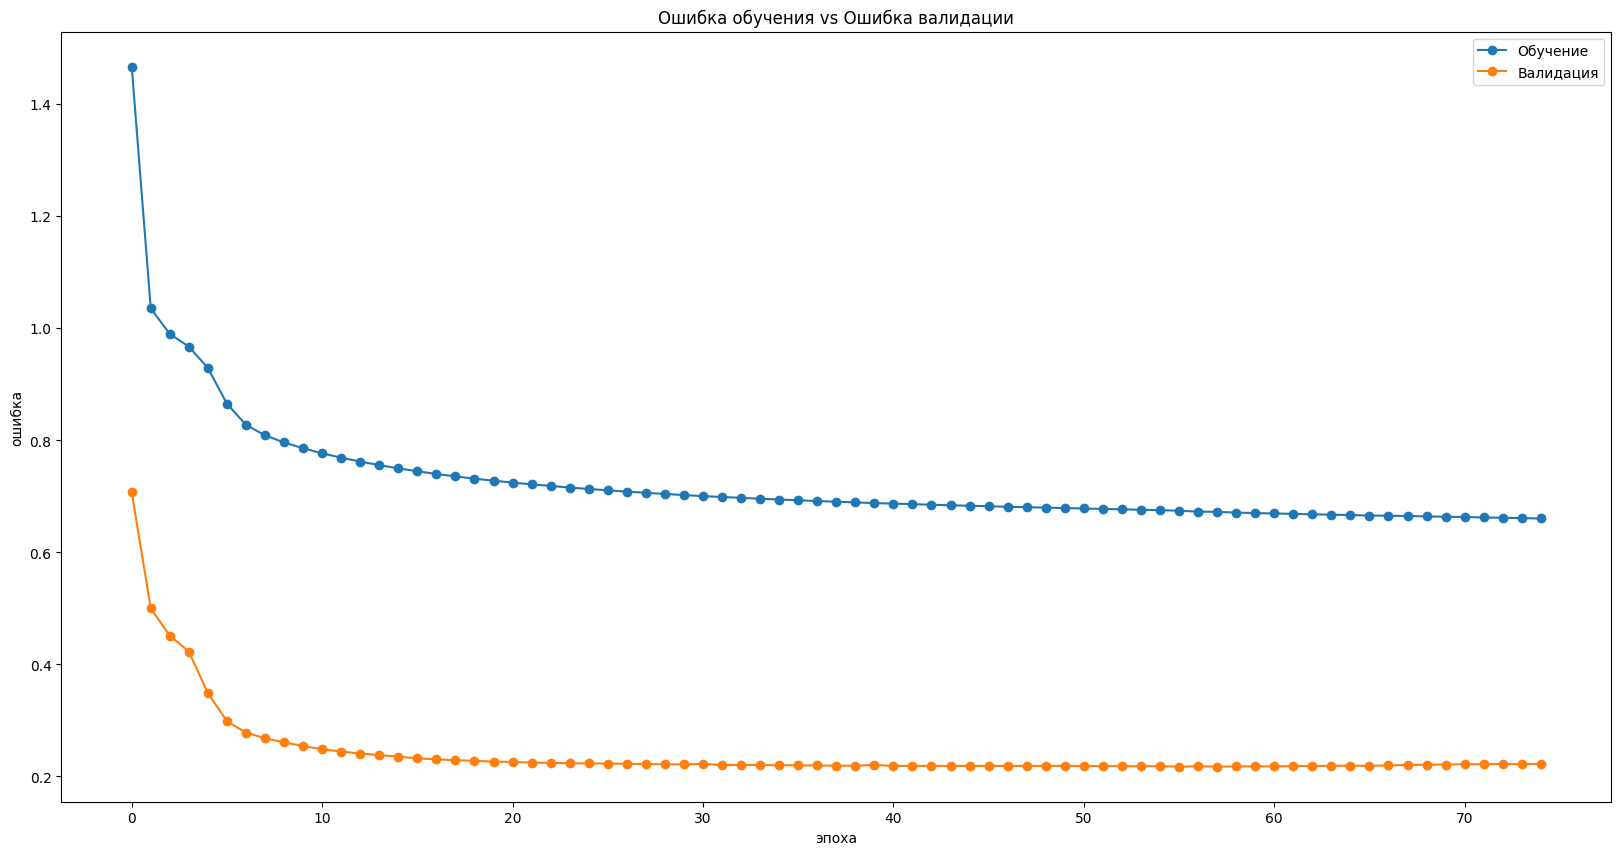

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('эпоха')
plt.ylabel('ошибка')
plt.legend(['Обучение','Валидация'])
plt.title('Ошибка обучения vs Ошибка валидации')
plt.show()

Выведем предсказания модели

In [ ]:
mean = scaled_features['Rent'][0]
std = scaled_features['Rent'][1]

In [ ]:
pred = []
target = []
for data in tqdm(test_loader):
  inputs, targets=data[0].to(device),data[1].to(device)
  outputs=model(inputs)
  pred.append(outputs.to('cpu').detach().numpy()* std + mean)
  target.append(targets.to('cpu').detach().numpy()* std + mean)

100%|██████████| 8/8 [00:00<00:00, 246.45it/s]


In [ ]:
pred=np.array(pred).flatten()
target=np.array(target).flatten()


In [ ]:
# даты
datesx = list(df_backup[-21*24:]['Publication Date'])
print(datesx)

['2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022-07-06', '2022

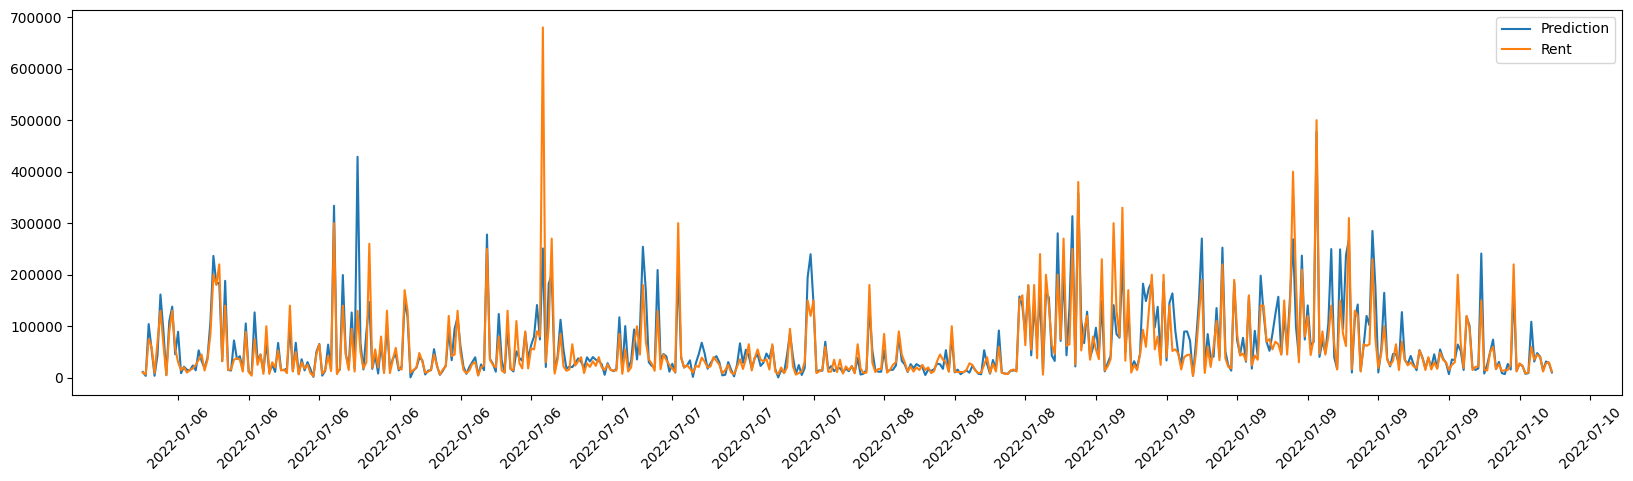

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(pred, label='Prediction')
ax.plot(target, label='Rent')
ax.set_xticks(np.arange(len(datesx))[12::24])
ax.set_xticklabels(datesx[12::24], rotation=45)
ax.legend()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
